In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [22]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix

In [3]:
character_1best_files = []
token_1best_files = []
character_2mid_files = []
token_2mid_files = []
character_3mid_files = []
token_3mid_files = []
character_4worst_files = []
token_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

In [4]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[float(num) for num in line.split(',') if num != "\n"][:754] for line in f ]
        matrixList.append(np.array(matrix))

In [5]:
random.seed(100)
character_1best_files = random.sample(character_1best_files, k = 4000)
random.seed(100)
token_1best_files = random.sample(token_1best_files, k= 4000)
#random.seed(100)
#character_2mid_files = random.sample(character_2mid_files, k = 1500)
#random.seed(100)
#token_2mid_files = random.sample(token_2mid_files, k= 1500)
#random.seed(100)
#character_3mid_files = random.sample(character_3mid_files, k = 1500)
#random.seed(100)
#token_3mid_files = random.sample(token_3mid_files, k= 1500)
random.seed(100)
character_4worst_files = random.sample(character_4worst_files, k = 4000)
random.seed(100)
token_4worst_files = random.sample(token_4worst_files, k= 4000)

In [6]:
#Adding Scalabrino
character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))


In [7]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []


matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)

print("done")

#matrixFileToMatrix(character_2mid_files, mid2_input_chars)
#matrixFileToMatrix(token_2mid_files, mid2_input_tokens)

print("done")

#matrixFileToMatrix(character_3mid_files, mid3_input_chars)
#matrixFileToMatrix(token_3mid_files, mid3_input_tokens)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)

done
done
done


In [8]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1])

#for x in mid2_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,0,1,0])
    
#for x in mid3_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0, 1])

#for x in mid2_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,0,1,0])

#for x in mid3_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0])

In [9]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

In [10]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

(8111, 50, 754)
(8111, 2)
(8111, 50, 754)
(8111, 2)


In [11]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

In [12]:
x_characters_train4, x_characters_test4, y_characters_train4, y_characters_test4 = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

#x_characters_train4, x_characters_valid4, y_characters_train4, y_characters_valid4 = train_test_split(
 #   x_characters_train4, y_characters_train4, test_size = 0.125, random_state=24)

x_tokens_train4, x_tokens_test4, y_tokens_train4, y_tokens_test4 = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

In [13]:
batch_size = 32
epochs = 6

model_chars_input = Input((50,754,1))

model_chars = Conv2D(100, kernel_size=(2, 754), strides=(1,1),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_chars)

model_tokens_input = Input((50,754,1))

model_tokens = Conv2D(100, kernel_size=(2, 754), strides=(1,1),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_tokens)


merged = Concatenate()([model_chars, model_tokens])
merged = Flatten()(merged)
#merged = Dense(5, activation='relu')(merged)
merged = Dropout(0.5)(merged)
merged = Dense(2, activation='softmax')(merged)

model_combined4 = Model(inputs=[model_chars_input, model_tokens_input], outputs=[merged])

print(model_combined4.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 input_2 (InputLayer)           [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 49, 1, 100)   150900      ['input_1[0][0]']                
                                                                                              

In [14]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

combined4_fit = model_combined4.fit([x_characters_train4, x_tokens_train4], y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test4, x_tokens_test4], y_characters_test4))
combined4_score = model_combined4.evaluate([x_characters_test4, x_tokens_test4], y_characters_test4, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/6
203/203 [==============================] - 51s 236ms/step - loss: 0.3457 - accuracy: 0.9160 - val_loss: 0.1425 - val_accuracy: 0.9649
Epoch 2/6
203/203 [==============================] - 37s 182ms/step - loss: 0.1727 - accuracy: 0.9524 - val_loss: 0.1056 - val_accuracy: 0.9704
Epoch 3/6
203/203 [==============================] - 35s 172ms/step - loss: 0.1521 - accuracy: 0.9579 - val_loss: 0.1199 - val_accuracy: 0.9698
Epoch 4/6
203/203 [==============================] - 35s 175ms/step - loss: 0.1304 - accuracy: 0.9598 - val_loss: 0.1128 - val_accuracy: 0.9704
Epoch 5/6
203/203 [==============================] - 35s 175ms/step - loss: 0.1123 - accuracy: 0.9675 - val_loss: 0.1335 - val_accuracy: 0.9680
Epoch 6/6
203/203 [==============================] - 35s 171ms/step - loss: 0.1322 - accuracy: 0.9659 - val_loss: 0.1113 - val_accuracy: 0.9636
Test loss: 0.11133239418268204
Test accuracy: 0.9636475443840027


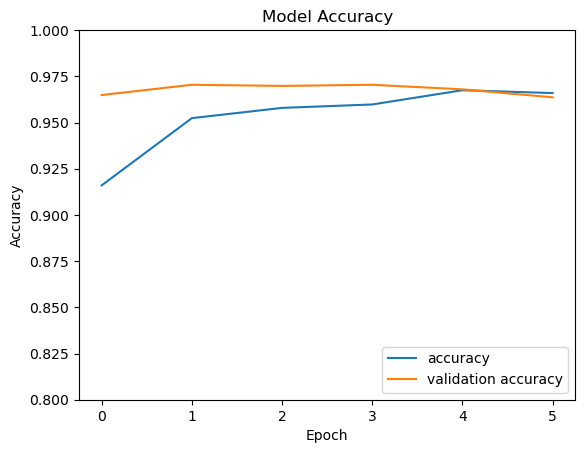

In [20]:
plt.plot(combined4_fit.history['accuracy'], label='accuracy')
plt.plot(combined4_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

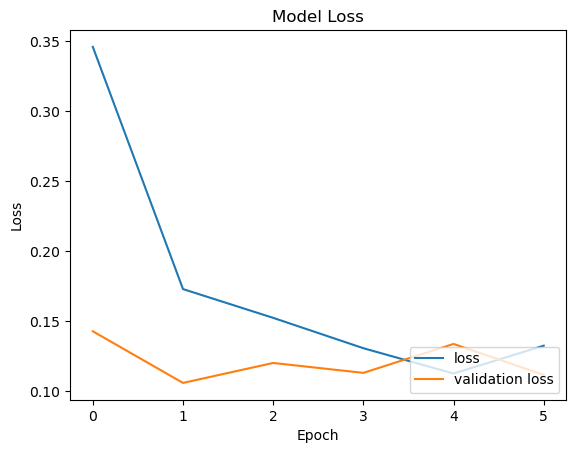

In [19]:
plt.plot(combined4_fit.history['loss'], label='loss')
plt.plot(combined4_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [21]:
mi_predict2 = model_combined4.predict([x_characters_test4, x_tokens_test4])

51/51 [==============================] - 5s 88ms/step


In [23]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[780  45]
 [ 14 784]]


# Single Character Based

In [32]:
batch_size = 32
epochs = 6

model4 = Sequential()
model4.add(Conv2D(100, kernel_size=(2, 754),
                 activation='relu',
                 input_shape=(50,754,1)))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size= (2,1)))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 49, 1, 100)        150900    
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 1, 100)        20100     
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 1, 100)        20100     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 1, 100)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2300)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2300)              0         
                                                      

In [39]:
ann_viz(model4, view=True, filename = "methodCharacterCNNMi",
        title="CNN for Character Representation of Methods Using Mi et al. Method")

In [25]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

character_fit = model4.fit(x_characters_train4, y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test4, y_characters_test4))
character_score = model4.evaluate(x_characters_test4, y_characters_test4, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/6
203/203 [==============================] - 21s 96ms/step - loss: 0.3097 - accuracy: 0.9098 - val_loss: 0.1704 - val_accuracy: 0.9636
Epoch 2/6
203/203 [==============================] - 19s 92ms/step - loss: 0.1615 - accuracy: 0.9551 - val_loss: 0.1407 - val_accuracy: 0.9575
Epoch 3/6
203/203 [==============================] - 18s 91ms/step - loss: 0.1512 - accuracy: 0.9602 - val_loss: 0.1340 - val_accuracy: 0.9643
Epoch 4/6
203/203 [==============================] - 17s 86ms/step - loss: 0.1458 - accuracy: 0.9625 - val_loss: 0.1061 - val_accuracy: 0.9710
Epoch 5/6
203/203 [==============================] - 17s 85ms/step - loss: 0.1209 - accuracy: 0.9629 - val_loss: 0.1072 - val_accuracy: 0.9704
Epoch 6/6
203/203 [==============================] - 17s 83ms/step - loss: 0.1274 - accuracy: 0.9672 - val_loss: 0.1037 - val_accuracy: 0.9729
Test loss: 0.10365709662437439
Test accuracy: 0.9728897213935852


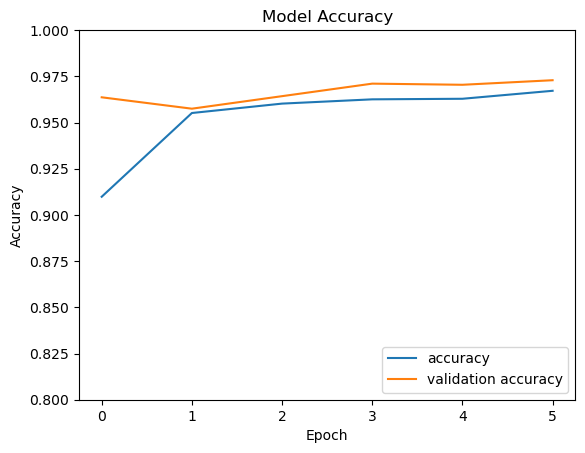

In [27]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

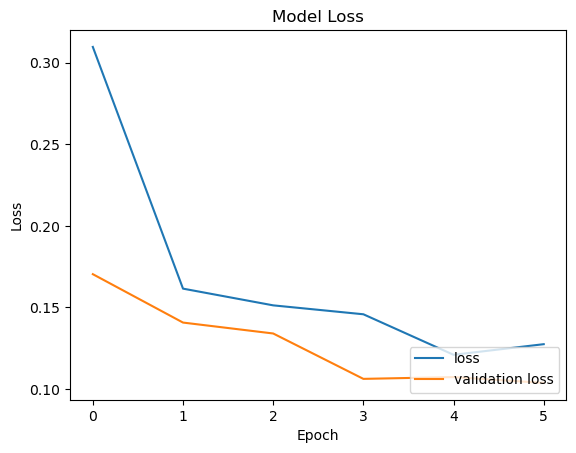

In [31]:
plt.plot(character_fit.history['loss'], label='loss')
plt.plot(character_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [29]:
mi_predict2 = model4.predict(x_characters_test4)

51/51 [==============================] - 2s 35ms/step


In [30]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[804  21]
 [ 23 775]]


# Token Based

In [33]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

token_fit = model4.fit(x_tokens_train4, y_tokens_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test4, y_tokens_test4))
token_score = model4.evaluate(x_tokens_test4, y_tokens_test4, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
203/203 [==============================] - 20s 93ms/step - loss: 0.3090 - accuracy: 0.8977 - val_loss: 0.1807 - val_accuracy: 0.9409
Epoch 2/6
203/203 [==============================] - 17s 82ms/step - loss: 0.1759 - accuracy: 0.9457 - val_loss: 0.1257 - val_accuracy: 0.9624
Epoch 3/6
203/203 [==============================] - 16s 80ms/step - loss: 0.1388 - accuracy: 0.9573 - val_loss: 0.1314 - val_accuracy: 0.9643
Epoch 4/6
203/203 [==============================] - 16s 81ms/step - loss: 0.1239 - accuracy: 0.9607 - val_loss: 0.1152 - val_accuracy: 0.9649
Epoch 5/6
203/203 [==============================] - 17s 85ms/step - loss: 0.1102 - accuracy: 0.9616 - val_loss: 0.1080 - val_accuracy: 0.9692
Epoch 6/6
203/203 [==============================] - 17s 83ms/step - loss: 0.1041 - accuracy: 0.9659 - val_loss: 0.1040 - val_accuracy: 0.9673
Test loss: 0.1039966270327568
Test accuracy: 0.9673444032669067


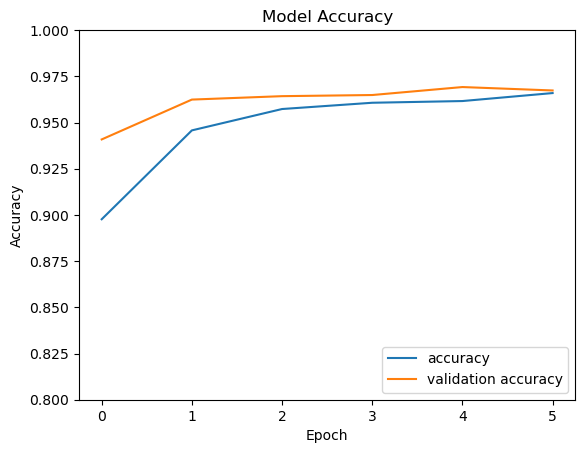

In [34]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

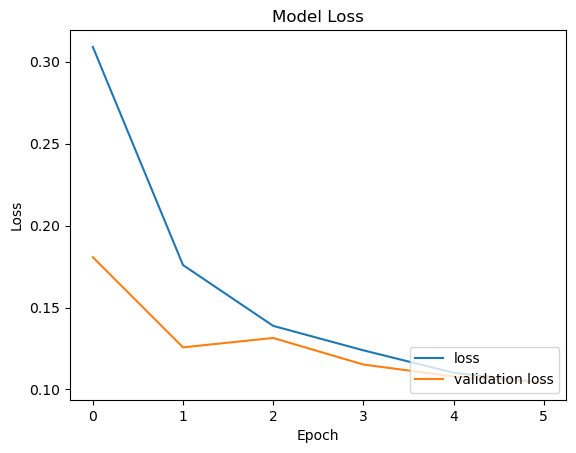

In [35]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [37]:
mi_predict2 = model4.predict(x_tokens_test4)

51/51 [==============================] - 2s 31ms/step


In [38]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_tokens_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[798  27]
 [ 26 772]]


# Scalabrino Test

In [36]:
character_1best_files = []
token_1best_files = []
character_2mid_files = []
token_2mid_files = []
character_3mid_files = []
token_3mid_files = []
character_4worst_files = []
token_4worst_files = []

#Adding Scalabrino
character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))


In [39]:
scala_best1_input_chars = []
scala_mid2_input_chars = []
scala_mid3_input_chars = []
scala_worst4_input_chars = []
scala_best1_input_tokens = []
scala_mid2_input_tokens = []
scala_mid3_input_tokens = []
scala_worst4_input_tokens = []


matrixFileToMatrix(character_1best_files, scala_best1_input_chars)
matrixFileToMatrix(token_1best_files, scala_best1_input_tokens)

print("done")

matrixFileToMatrix(character_2mid_files, scala_mid2_input_chars)
matrixFileToMatrix(token_2mid_files, scala_mid2_input_tokens)

print("done")

matrixFileToMatrix(character_3mid_files, scala_mid3_input_chars)
matrixFileToMatrix(token_3mid_files, scala_mid3_input_tokens)

print("done")

matrixFileToMatrix(character_4worst_files, scala_worst4_input_chars)
matrixFileToMatrix(token_4worst_files, scala_worst4_input_tokens)

done
done
done


In [40]:
scala_input2_characters_x = []
scala_input2_characters_y = []

scala_input2_tokens_x = []
scala_input2_tokens_y = []

for x in scala_best1_input_chars:
    scala_input2_characters_x.append(x)
    scala_input2_characters_y.append([0,1])

#for x in mid2_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,0,1,0])
    
#for x in mid3_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,1,0,0])

for x in scala_worst4_input_chars:
    scala_input2_characters_x.append(x)
    scala_input2_characters_y.append([1,0])



for x in scala_best1_input_tokens:
    scala_input2_tokens_x.append(x)
    scala_input2_tokens_y.append([0, 1])

#for x in mid2_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,0,1,0])

#for x in mid3_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,1,0,0])

for x in scala_worst4_input_tokens:
    scala_input2_tokens_x.append(x)
    scala_input2_tokens_y.append([1,0])

In [42]:
scala_input2_characters_x = np.array(scala_input2_characters_x)
scala_input2_characters_y = np.array(scala_input2_characters_y)

scala_input2_tokens_x = np.array(scala_input2_tokens_x)
scala_input2_tokens_y = np.array(scala_input2_tokens_y)

In [44]:
combined4_score = model_combined4.evaluate([scala_input2_characters_x, scala_input2_tokens_x], scala_input2_characters_y, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Test loss: 1.7342760562896729
Test accuracy: 0.6036036014556885


In [64]:
scala_input2_characters_x, scala_input2_characters_y = shuffle(scala_input2_characters_x, scala_input2_characters_y, random_state=70)

scala_input2_tokens_x, scala_input2_tokens_y = shuffle(scala_input2_tokens_x, scala_input2_tokens_y, random_state=70)

In [65]:
scala_x_characters_train2, scala_x_characters_test2, scala_y_characters_train2, scala_y_characters_test2 = train_test_split(
    scala_input2_characters_x, scala_input2_characters_y, test_size = 0.2, random_state=24)

#x_characters_train4, x_characters_valid4, y_characters_train4, y_characters_valid4 = train_test_split(
 #   x_characters_train4, y_characters_train4, test_size = 0.125, random_state=24)

scala_x_tokens_train2, scala_x_tokens_test2, scala_y_tokens_train2, scala_y_tokens_test2 = train_test_split(
    scala_input2_tokens_x, scala_input2_tokens_y, test_size = 0.2, random_state=24)

In [68]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

combined4_fit = model_combined4.fit([scala_x_characters_train2, scala_x_tokens_train2], scala_y_characters_train2,
          batch_size=20,
          epochs=20,
          verbose=1,
          validation_data=([scala_x_characters_test2, scala_x_tokens_test2], scala_y_characters_test2))
combined4_score = model_combined4.evaluate([scala_x_characters_test2, scala_x_tokens_test2], scala_y_characters_test2, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/20
5/5 [==============================] - 1s 151ms/step - loss: 2.1638 - accuracy: 0.5909 - val_loss: 3.9867 - val_accuracy: 0.4783
Epoch 2/20
5/5 [==============================] - 0s 96ms/step - loss: 3.6459 - accuracy: 0.4773 - val_loss: 1.4906 - val_accuracy: 0.4348
Epoch 3/20
5/5 [==============================] - 1s 105ms/step - loss: 1.2818 - accuracy: 0.6591 - val_loss: 1.3073 - val_accuracy: 0.4348
Epoch 4/20
5/5 [==============================] - 0s 91ms/step - loss: 1.1658 - accuracy: 0.6477 - val_loss: 1.3695 - val_accuracy: 0.3913
Epoch 5/20
5/5 [==============================] - 0s 77ms/step - loss: 1.1220 - accuracy: 0.6591 - val_loss: 1.2533 - val_accuracy: 0.3913
Epoch 6/20
5/5 [==============================] - 0s 81ms/step - loss: 0.9208 - accuracy: 0.7273 - val_loss: 1.0080 - val_accuracy: 0.5652
Epoch 7/20
5/5 [==============================] - 0s 82ms/step - loss: 0.8871 - accuracy: 0.7500 - val_loss: 0.9550 - val_accuracy: 0.5217
Epoch 8/20
5/5 [=========

# Four Class Style

In [ ]:
# tweak above